In [117]:
import numpy as np
import matplotlib.pyplot as plt

# Training data
X_positive = np.array([[-2, 9], [3, 14], [4, 4], [8, -6], [12, -4], [13, 11]])
X_negative = np.array([[-11, 8], [-8, -3], [-6, 4], [-2, -10], [2, -15], [6, -14]])

# Combine the data
X = np.vstack((X_negative, X_positive))
y = np.array([-1] * len(X_negative) + [1] * len(X_positive))  # Labels

# Problem size
N, d = X.shape

# QP setup
Q = np.zeros((d + 1, d + 1))  # Quadratic matrix for [b, w1, w2]
Q[1:, 1:] = np.eye(d) * 1.0  # Regularization for weights
A = np.hstack((y[:, None], y[:, None] * X))  # Combine bias and weights
c = np.ones(N)  # Right-hand side of constraints
Q, A

In [118]:
# Gradient descent parameters
learning_rate = 0.001
num_iterations = 10000
epsilon = 1e-6  # Tolerance for convergence

# Initialize variables
u = np.zeros(1 + d)  # [b, w1, w2]

# Gradient descent to solve the QP
for iteration in range(num_iterations):
    gradient = Q @ u  # Gradient of the quadratic term
    
    # Add violated constraints to the gradient
    for i in range(N):
        constraint_violation = np.dot(A[i], u) - c[i]
        if constraint_violation < 0:
            gradient += -A[i]  # Add the violated constraint to the gradient
    
    # Update u
    u -= learning_rate * gradient

    # Projection step to enforce constraints
    for i in range(N):
        if np.dot(A[i], u) - c[i] < 0:
            u += (c[i] - np.dot(A[i], u)) * A[i] / np.linalg.norm(A[i])**2

    # Check for convergence
    if np.linalg.norm(gradient) < epsilon and all(np.dot(A, u) - c >= -epsilon):
        break

# Extract results
optimal_b = u[0]
optimal_w = u[1:]

optimal_b, optimal_w


(np.float64(-0.0993908239740871), array([0.29125707, 0.19124125]))

In [119]:
# Identify support vectors and margin weigth
margin_width = 2 / np.linalg.norm(optimal_w)
decision_values = y * (X @ optimal_w + optimal_b)  # Compute decision values
support_vectors = np.where(np.isclose(decision_values, 1, atol=2e-1))[0]  # Identify indices

margin_width, support_vectors

(np.float64(5.740023561602347), array([2, 5, 6, 9]))

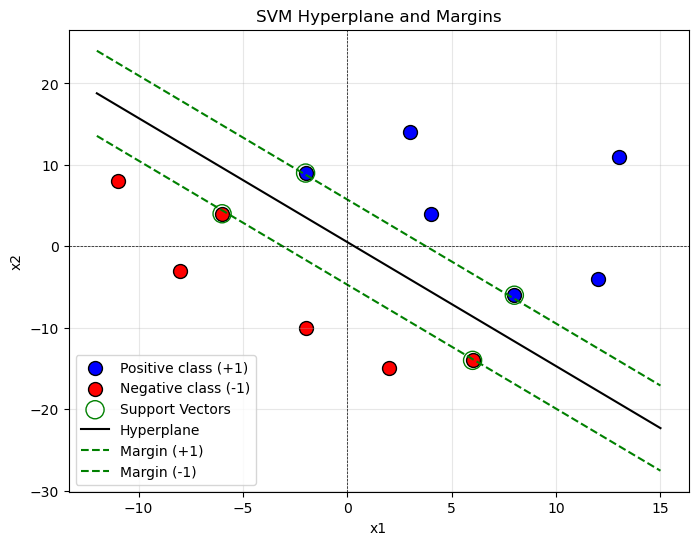

In [120]:
# Plot settings
plt.figure(figsize=(8, 6))

# Plot the points
plt.scatter(X_positive[:, 0], X_positive[:, 1], color='blue', label='Positive class (+1)', s=100, edgecolor='k')
plt.scatter(X_negative[:, 0], X_negative[:, 1], color='red', label='Negative class (-1)', s=100, edgecolor='k')

# Highlight support vectors
plt.scatter(X[support_vectors, 0], X[support_vectors, 1], s=170,
            facecolors='none', edgecolors='green', label='Support Vectors')

# Hyperplane
x_vals = np.linspace(-12, 15, 300)
hyperplane = -(optimal_w[0] * x_vals + optimal_b) / optimal_w[1]
margin_up = -(optimal_w[0] * x_vals + optimal_b + 1) / optimal_w[1]
margin_down = -(optimal_w[0] * x_vals + optimal_b - 1) / optimal_w[1]

plt.plot(x_vals, hyperplane, 'k-', label='Hyperplane')
plt.plot(x_vals, margin_up, 'g--', label='Margin (+1)')
plt.plot(x_vals, margin_down, 'g--', label='Margin (-1)')

# Additional plot settings
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('SVM Hyperplane and Margins')
plt.legend()
plt.grid(alpha=0.3)
plt.show()
